# Описание проекта

Мы стажируемся в отделе аналитики Яндекс.Афиши. Задание: помочь маркетологам оптимизировать маркетинговые затраты.
У нас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

# Загрузим данные и подготовим их к анализу

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv') #загрузим данные о визитах
orders = pd.read_csv('/datasets/orders_log.csv') #загрузим данные о заказах
costs = pd.read_csv('/datasets/costs.csv') #загрузим данные о расходах

изучим и подготовим таблицу 'visits'

In [3]:
visits.info() #выведем общую информацию о таблице
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


В таблице 'visits' 5 столбцов, представленных типами данных int64(1), object(3), uint64(1).

In [4]:
#переименуем столбцы
visits = visits.rename(columns={'End Ts': 'session_end', 'Start Ts': 'session_start', 'Source Id': 'source_id'})
visits.columns = visits.columns.str.lower()

In [5]:
#изменим тип данных столбцов 'session_end' и 'session_start' на дату
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
#напишем функцию для добавления столбца 'session_id'
id_counter = 1
    
def do_id(data):
    global id_counter
    id_to_return = id_counter
    id_counter = id_counter + 1
    return id_to_return

visits['session_id'] = visits.apply(do_id, axis=1)

In [7]:
visits.head()

,device,session_end,source_id,session_start,uid,session_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,3
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,4
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,5


изучим и подготовим таблицу 'orders'

In [8]:
orders.info() #выведем общую информацю о таблице
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


В таблице 'orders' 3 столбца, представленных типами данных float64(1), object(1), uint64(1).

In [9]:
#переименуем столбцы
orders = orders.rename(columns={'Buy Ts': 'purchase_date'})
orders.columns = orders.columns.str.lower()

In [10]:
#изменим тип данных столбца 'purchase_date' на дату
orders['purchase_date'] = pd.to_datetime(orders['purchase_date'])

изучим и подготовим таблицу 'costs'

In [11]:
costs.info() #выведем общую информацю о таблице
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


В таблице 'costs' 3 столбца, представленных типами данных float64(1), int64(1), object(1).

In [12]:
#переименуем столбцы
costs = costs.rename(columns={'dt': 'date'})
costs.columns = costs.columns.str.lower()

In [13]:
#изменим тип данных столбца 'date' на дату
costs['date'] = pd.to_datetime(costs['date'], format='%Y-%m-%d')

# Проанализируем данные и посчитаем метрики

#### Проанализируем продукт:
    
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

##### сколько людей пользуются в день, неделю, месяц

In [14]:
#чтобы посчитать недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату
visits['session_year']  = visits['session_start'].dt.year
visits['session_month'] = visits['session_start'].dt.month
visits['session_week']  = visits['session_start'].dt.week
visits['session_date'] = visits['session_start'].dt.date
visits.head()

,device,session_end,source_id,session_start,uid,session_id,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,1,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,3,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,4,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,5,2017,12,52,2017-12-27


In [15]:
#cгруппируем данные по уникальным пользователям и найдём среднее
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [16]:
dau_total.round() #количество уникальных пользователей в день

uid    908.0
dtype: float64

In [17]:
wau_total.round() #количество уникальных пользователей в неделю

uid    5716.0
dtype: float64

In [18]:
mau_total.round() #количество уникальных пользователей в месяц

uid    23228.0
dtype: float64

In [19]:
#посчитаем sticky factor, чтобы узнать, как часто люди обращаются к приложению
sticky_mau = dau_total / mau_total * 100
sticky_mau

uid    3.90897
dtype: float64

In [20]:
sticky_wau = dau_total / wau_total * 100
sticky_wau

uid    15.884409
dtype: float64

##### количество сессий в день

In [21]:
#чтобы посчитать количество сессий на одного пользователя в день, разделим число сессий на количество пользователей за период
sessions_per_user = visits.groupby(['session_date']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']
sessions_per_user

,n_sessions,n_users,sessions_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


В месяц один пользователь в среднем проводит в приложении максимум 1 сессию. Не сказать, что продукт используется регулярно.

##### средняя продолжительность сессии

In [22]:
#найдем среднюю продолжительность сесии (ASL): посчитаем длину всех сессий и вычислим среднее
visits['session_duration_sec'] = (visits['session_end'] - visits['session_start']).dt.seconds
visits['session_duration_sec'].mean()

643.506488592098

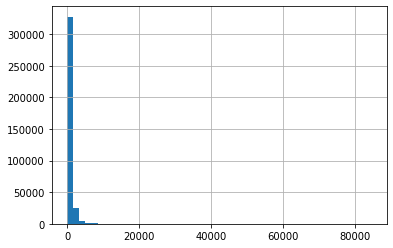

In [23]:
#посмотрим на распределение
visits['session_duration_sec'].hist(bins=50)

In [24]:
#рассчитаем моду
visits['session_duration_sec'].mode()

0    60
dtype: int64

##### как часто пользователи возвращаются

In [25]:
#сформируем когорту по дате первой сессии
first_session_date = visits.groupby(['uid'])['session_start'].min()
first_session_date.name = 'first_session_date'
visits = visits.join(first_session_date,on='uid')
visits['session_month'] = visits['session_date'].astype('datetime64[M]')
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')

In [26]:
#для каждой строки датафрейма рассчитаем lifetime пользователя в рамках когорты
visits['cohort_lifetime'] = visits['session_month'] - visits['first_session_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

In [27]:
#сгруппируем данные по когорте и lifetime. Посчитаем для каждой когорты количество активных пользователей на определённую «неделю жизни»
cohorts = visits.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

#найдём исходное количество пользователей в когорте на нулевую неделю
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

#объединим данные по когортам с исходным количеством пользователей в когорте
cohorts = cohorts.merge(initial_users_count,on='first_session_month')

In [28]:
#рассчитаем Retention Rate
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

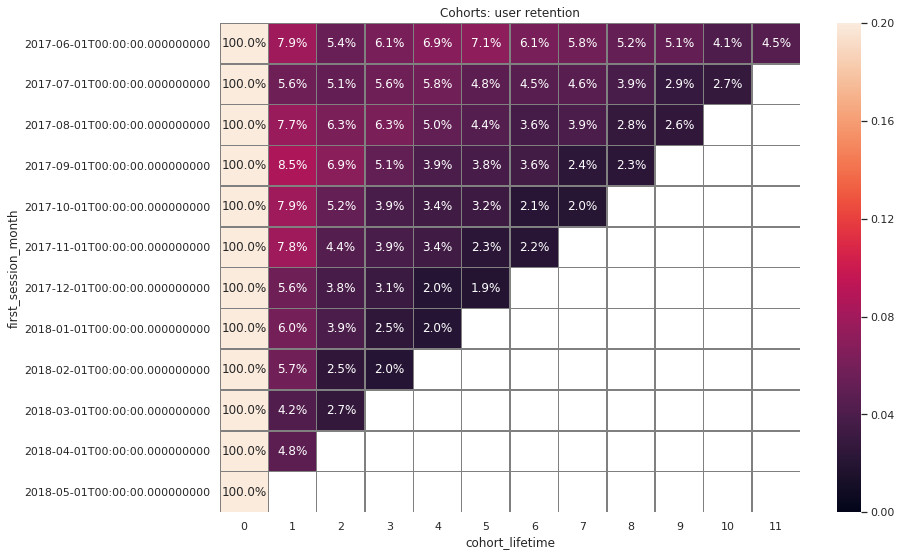

In [29]:
#сформируем сводную таблицу и создадим тепловую карту
retention_pivot = cohorts.pivot_table(index='first_session_month',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('Cohorts: user retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=.5, linecolor='gray', vmin=0, vmax=0.2);

### Выводы

- Количество пользователей:
    - DAU: 908 пользователей (в день);
    - WAU: 5716 пользователя (в неделю);
    - MAU: 23228 пользователей (в месяц).
    
- Среднее количество сессий в день составляет 987 (то есть в среднем каждый пользователь заходит на ресурс 1 раз в день).

- Среднестатистическая длительность одной сессии составляет 1 минуту.

- Retention довольно низкий, лучшие результаты показывает первая когорта.

#### Проанализируем продажи:
    
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят (LTV)?

##### когда люди начинают покупать

In [30]:
#сгруппируем данные и получим дату первого заказа по каждому пользователю
first_order_date_by_customers = orders.groupby('uid')['purchase_date'].min() 
first_order_date_by_customers.name = 'first_order_date'
orders = orders.join(first_order_date_by_customers,on='uid')
#выделим из столбцов 'first_order_date' и 'purchase_date' месяцы
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['purchase_date'].astype('datetime64[M]')
orders.head(10)

,purchase_date,revenue,uid,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,2017-06-01,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,2017-06-01,2017-06-01
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,2017-06-01,2017-06-01
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00,2017-06-01,2017-06-01
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00,2017-06-01,2017-06-01


In [31]:
#сгруппируем датафреймы 'orders' и 'visits' по дате первого заказа и первой сессии
first_purchase_date = orders.groupby('uid')[['purchase_date']].min().reset_index()
first_purchase_date.columns = ['uid', 'first_purchase_date']
first_session_date = visits.groupby('uid')[['session_start']].min().reset_index()
first_session_date.columns = ['uid', 'first_session']

In [32]:
#сведем данные в общий датафрейм
time_to_buy = first_purchase_date.merge(first_session_date, on='uid')
time_to_buy.head()

,uid,first_purchase_date,first_session
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [33]:
#посчитаем разницу в минутах между датой и временем первого заказа и датой и временем первой сессии
time_to_buy['interval'] = time_to_buy['first_purchase_date'] - time_to_buy['first_session']
time_to_buy['interval'] = time_to_buy['interval'] / np.timedelta64(1, 'm')
time_to_buy['interval'] = time_to_buy['interval'].round(1)
time_to_buy.head()

,uid,first_purchase_date,first_session,interval
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,154022.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,79.0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0


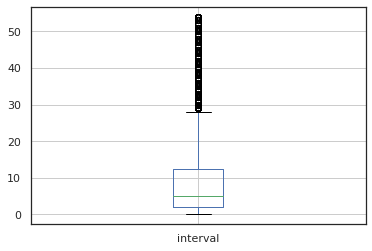

In [34]:
#сгруппируем датафрейм по 'uid' и определим минимальный интервал между первой сессией и первой покупкой
time_to_buy = time_to_buy.groupby('uid')[['interval']].min()
time_to_buy.query('interval < 55').boxplot()

In [35]:
#выведем медиану времени между первой сессией и первой покупкой
time_to_buy.median()

interval    16.0
dtype: float64

##### сколько раз клиенты покупают за период

In [36]:
#чтобы понять, сколько раз пользователи покупают за период, построим сводную таблицу
orders.pivot_table(index='first_order_month',
    columns='order_month',
    values='uid',
    aggfunc='nunique').fillna('')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023,61,50,54,88,67,62,47,58,45,45,53,
2017-07-01,,1923,52,57,64,49,38,36,39,42,22,26,
2017-08-01,,,1370,58,53,44,40,32,30,44,19,31,
2017-09-01,,,,2581,130,100,74,52,64,66,37,43,
2017-10-01,,,,,4340,206,123,92,93,72,56,67,
2017-11-01,,,,,,4081,222,120,106,81,48,62,
2017-12-01,,,,,,,4383,146,103,97,50,63,
2018-01-01,,,,,,,,3373,114,83,43,45,
2018-02-01,,,,,,,,,3651,118,58,39,


- после первого месяца количество покупателей в когорте снижается;
- в некоторых когортах число покупателей периодически начинает расти.

In [37]:
#выделим когорты по первой сессии и по месяцам
purchases_grouped_by_cohorts = orders.groupby(['first_order_month']).agg({'purchase_date':'count', 'uid':'nunique'})
#посчитаем количество заказов в месяц на одного пользователя
purchases_grouped_by_cohorts['purchases_per_user'] = purchases_grouped_by_cohorts['purchase_date'] / purchases_grouped_by_cohorts['uid']
purchases_grouped_by_cohorts = purchases_grouped_by_cohorts.reset_index()
purchases_grouped_by_cohorts.round().head()

,first_order_month,purchase_date,uid,purchases_per_user
0,2017-06-01,4438,2023,2.0
1,2017-07-01,2910,1923,2.0
2,2017-08-01,2188,1370,2.0
3,2017-09-01,3878,2581,2.0
4,2017-10-01,6005,4340,1.0


In [38]:
#выведем среднее количество заказов на одного пользователя в месяц
purchases_grouped_by_cohorts['purchases_per_user'].mean().round()

1.0

##### средний чек

In [39]:
orders['mean_check'] = orders['revenue'].sum() / orders['revenue'].count()
mean_check_value = orders['mean_check'].round()
mean_check_value.mean().round()

5.0

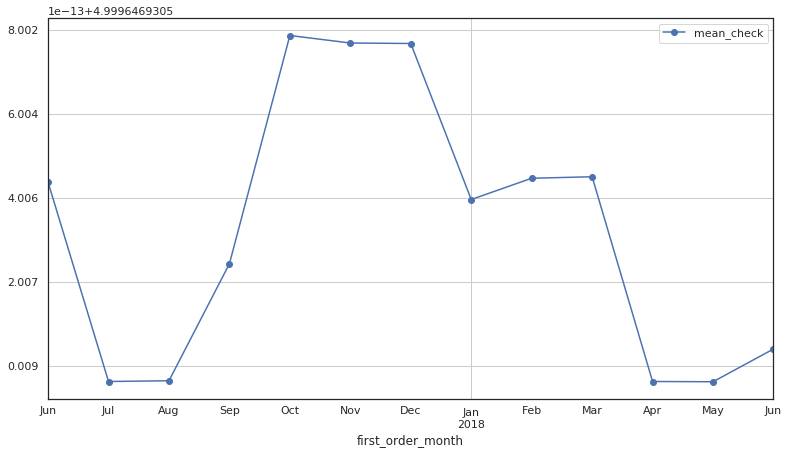

In [40]:
orders.groupby('first_order_month').agg({'mean_check':'mean'}).plot(figsize=(13, 7), style='o-', grid=True)

##### сколько денег приносят пользователи (LTV)

In [41]:
#посчитаем количество новых покупателей (n_buyers) за каждый месяц
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [42]:
#сформируем когорты по месяцам
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [43]:
report = cohorts.merge(cohort_sizes, on='first_order_month')

report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['revenue'] / report['n_buyers'] #посчитаем, сколько денег приносят пользователи

result = report.pivot_table(index='first_order_month',
                            columns='age',
                            values='ltv',
                            aggfunc='mean').cumsum(axis=1).round(1)

result.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.7,5.2,5.6,6.6,7.6,8.4,9.3,9.9,10.4,11.1,11.6,11.9
2017-07-01,6.0,6.3,7,7.3,7.5,7.7,7.8,7.9,8.1,8.2,8.4,
2017-08-01,5.3,5.7,6.2,6.6,7.1,7.4,7.6,8,8.3,8.5,,
2017-09-01,5.6,6.8,7.3,11.3,11.7,12.3,13,13.3,13.4,,,
2017-10-01,5.0,5.5,5.7,5.9,6,6.2,6.2,6.4,,,,
2017-11-01,5.2,5.6,5.8,6.1,6.2,6.3,6.4,,,,,
2017-12-01,4.7,5,5.9,7,7.3,7.6,,,,,,
2018-01-01,4.1,4.4,4.7,4.9,4.9,,,,,,,
2018-02-01,4.2,4.4,4.5,4.6,,,,,,,,


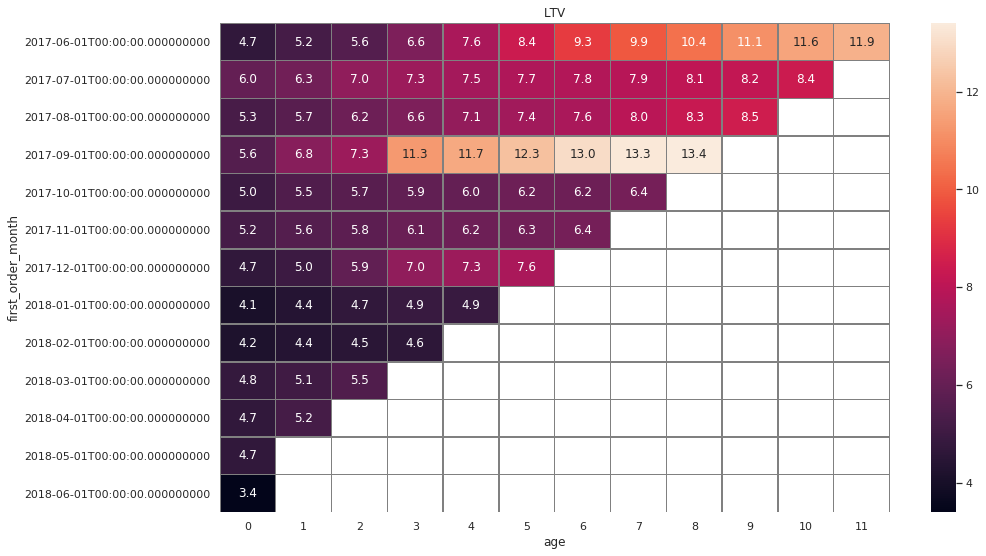

In [44]:
#визуализируем LTV
sns.set(style='white')
plt.figure(figsize=(15,9))
plt.title('LTV')
sns.heatmap(result, annot=True, fmt='.3', linewidths=.5, linecolor='gray');

## Выводы

- покупать люди начинают в среднем через 16 минут после начала сессии;
- после первого месяцв число покупок резко снижается;
- средний чек составляет 5 т.р.;
- по показателю LTV первая когорта была самая стабильная - практически в каждом месяце она показывала лучший результат по LTV среди всех когорт; вероятно, это коррелирует с наилучшим показателем Retention этой же когорты.

#### Анализ данных по маркетингу:
    
- Сколько денег потратили? Всего/ на каждый источник/ по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)

##### посчитаем, сколько денег потратили

In [45]:
#выведем, сколько денег потратили всего
costs['costs'].sum()

329131.62

In [46]:
#выведем, сколько денег потратили на каждый источник
costs.groupby('source_id').agg({'costs': 'sum'})

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [47]:
#выделим месяцы из дат в таблице с расходами
costs['month'] = costs['date'].astype('datetime64[M]')
costs.head()

,source_id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [48]:
#найдём суммарные расходы за каждый месяц
monthly_costs = costs.groupby(['month', 'source_id']).agg({'costs':'sum'}).reset_index()
monthly_costs.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


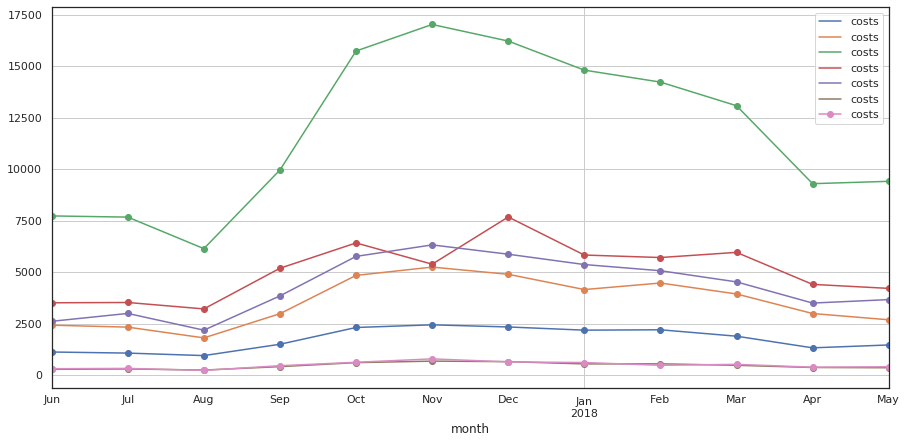

In [49]:
#выведем график изменения суммарных расходов когорт в зависимости от источника
monthly_costs_gr = costs.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index()
fig, ax = plt.subplots()    

def graphic(data):
    data.plot(x='month', y='costs', style='o-', ax=ax, grid=True, legend=True, figsize=(15, 7))

for i in monthly_costs_gr['source_id'].unique():
    graphic(monthly_costs_gr.query('source_id == @i'))

##### стоимость привлечения одного покупателя из каждого источника

In [50]:
#определим посетителей
visits_sorted = visits.sort_values(by='session_start')

#сгруппируем затраты по источникам
costs_per_source = costs.groupby('source_id').agg({'costs': 'sum'})

#сгруппируем выручку по источникам
first_source_per_user = visits_sorted.groupby('uid').agg({'source_id': 'first'})
client_per_source = orders.merge(first_source_per_user, on='uid')
client_per_source = client_per_source.groupby('source_id').agg({'uid': 'nunique'})

#сгруппируем уникальных пользователей по источникам
uid_per_source = visits_sorted.groupby('source_id').agg({'uid': 'nunique'})

#сгруппируем выручку с каждого источника
revenue_per_source = orders.merge(first_source_per_user, on='uid')
revenue_per_source = revenue_per_source.groupby('source_id').agg({'revenue': 'sum'})

#объединим полученные данные
revenue_uid_costs_per_source = pd.concat([costs_per_source, revenue_per_source, 
                                      uid_per_source, client_per_source],axis=1).fillna(0)
revenue_uid_costs_per_source = revenue_uid_costs_per_source.reset_index()
revenue_uid_costs_per_source.columns = ['source_id', 'costs', 'revenue', 'uid', 'clients']
revenue_uid_costs_per_source

,source_id,costs,revenue,uid,clients
0,1,20833.27,31090.55,18999,2899.0
1,2,42806.04,46923.61,26245,3506.0
2,3,141321.63,54511.24,74756,10473.0
3,4,61073.60,56696.83,83525,10296.0
4,5,51757.10,52624.02,56974,6931.0
5,6,0.00,0.00,6,0.0
6,7,0.00,1.22,34,1.0
7,9,5517.49,5759.40,9264,1088.0
8,10,5822.49,4450.33,8067,1329.0


In [51]:
#выведем стоимость привлечения одного покупателя из каждого источника
revenue_uid_costs_per_source['cac'] = revenue_uid_costs_per_source['costs'] / revenue_uid_costs_per_source['clients']
revenue_uid_costs_per_source['cac'] = revenue_uid_costs_per_source['cac'].round(2)
revenue_uid_costs_per_source['cac'].sort_values(ascending=False).to_frame()

,cac
2,13.49
1,12.21
4,7.47
0,7.19
3,5.93
7,5.07
8,4.38
6,0.00
5,NaN


In [52]:
#выведем среднюю стоимость привлечения покупателя для всех источников
revenue_uid_costs_per_source['cac'].mean().round()

7.0

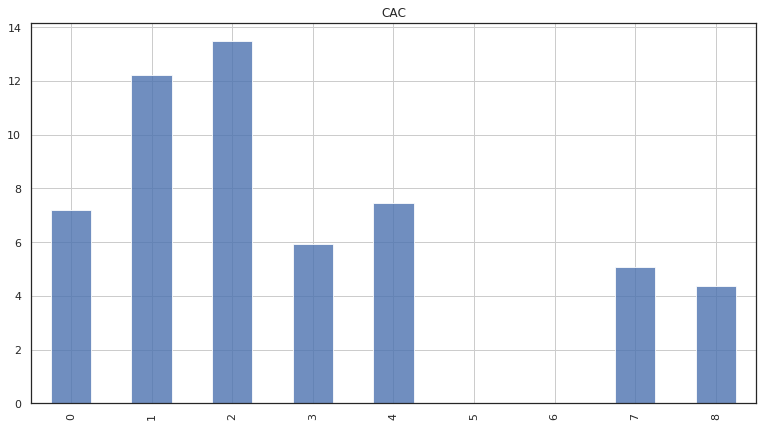

In [53]:
#визуализируем CAC
revenue_uid_costs_per_source['cac'].plot(kind='bar', figsize=(13,7), style='o-', grid=True, y='source_id', x='cac', alpha=0.8, title='CAC')

##### на сколько окупились расходы (ROMI)

In [54]:
dataframe = pd.merge(first_source_per_user, orders, on='uid')
dataframe['purchase_date'] = dataframe['purchase_date'].astype('datetime64[M]')
first_orders_month_data = dataframe.groupby('uid').agg({'purchase_date': 'min'}).reset_index()
first_orders_month_data.columns = ['uid', 'first_purchase_date']
cohort_size = first_orders_month_data.groupby('first_purchase_date').agg({'uid': 'nunique'}).reset_index()
cohort_size.columns = ['first_purchase_date', 'n_buyers']
orders_new = dataframe.merge(first_orders_month_data, on='uid')
cohort_data = orders_new.groupby(['purchase_date', 'first_purchase_date']).agg({'revenue': 'sum'}).reset_index()
    
report = cohort_data.merge(cohort_size, on='first_purchase_date')
report['gp'] = report['revenue']
report['age'] = (report['purchase_date'] - report['first_purchase_date']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']
    
monthly_one_costs = monthly_costs.groupby('month').agg({'costs': 'sum'}).reset_index()
report_one = pd.merge(report, monthly_one_costs, left_on='first_purchase_date', right_on='month')
report_one['cac'] = report_one['costs'] / report_one['n_buyers']
report_one['romi'] = report_one['ltv'] / report_one['cac']
final = report_one.pivot_table(index='first_purchase_date', columns='age',values='romi', aggfunc='mean')
romi = final.cumsum(axis=1).round(2)
romi.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_date,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


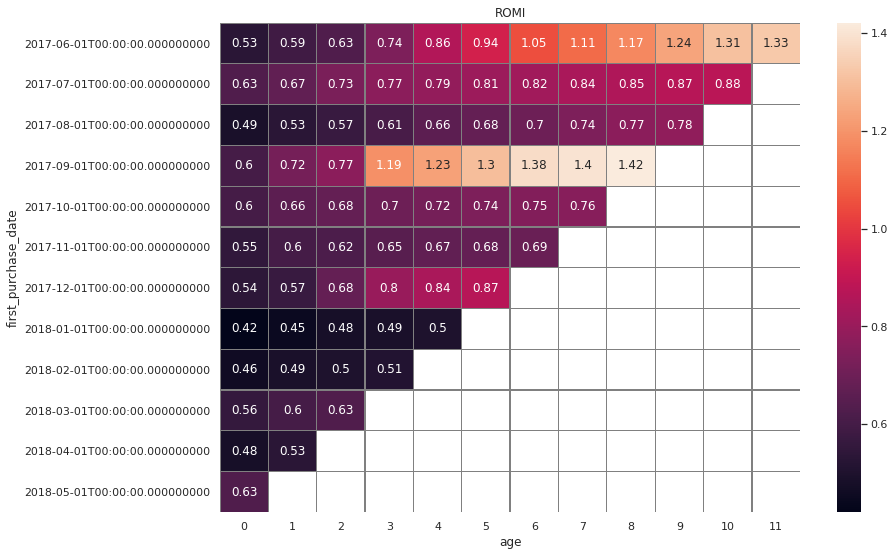

In [55]:
#визуализируем ROMI
sns.set(style='white')
plt.figure(figsize=(13,9))
plt.title('ROMI')
sns.heatmap(romi, annot=True, fmt='.3', linewidths=.25, linecolor='gray');

In [56]:
#выведем среднюю когорту
romi.mean(axis=0).round(2)

age
0     0.54
1     0.58
2     0.63
3     0.72
4     0.78
5     0.86
6     0.90
7     0.97
8     1.05
9     0.96
10    1.10
11    1.33
dtype: float64

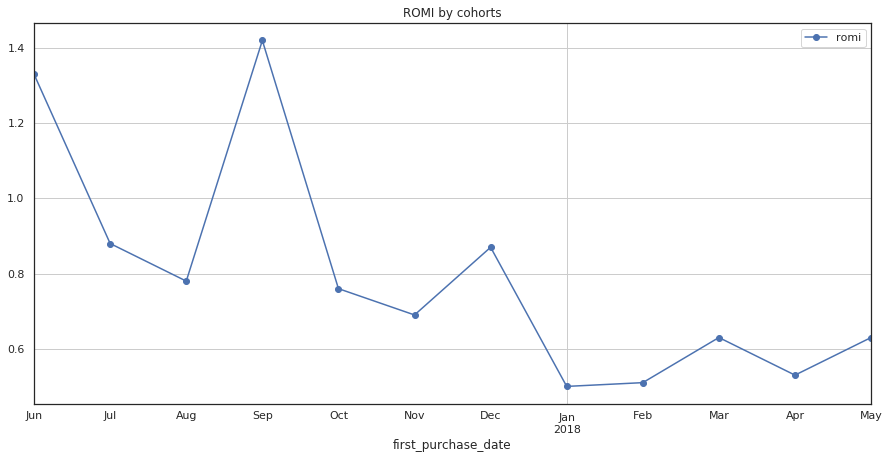

In [57]:
#выведем суммарный romi для каждой когорты на график
cohorts_romi = report_one.groupby('first_purchase_date').agg({'romi': 'sum'}).round(2)
cohorts_romi.plot(figsize=(15, 7), style = 'o-', legend=True, grid=True, title='ROMI by cohorts') #выведем график изменения romi в завимисомти от когорты

In [58]:
cohorts_romi

,romi
first_purchase_date,
2017-06-01,1.33
2017-07-01,0.88
2017-08-01,0.78
2017-09-01,1.42
2017-10-01,0.76
2017-11-01,0.69
2017-12-01,0.87
2018-01-01,0.50
2018-02-01,0.51


In [59]:
revenue_uid_costs_per_source

,source_id,costs,revenue,uid,clients,cac
0,1,20833.27,31090.55,18999,2899.0,7.19
1,2,42806.04,46923.61,26245,3506.0,12.21
2,3,141321.63,54511.24,74756,10473.0,13.49
3,4,61073.60,56696.83,83525,10296.0,5.93
4,5,51757.10,52624.02,56974,6931.0,7.47
5,6,0.00,0.00,6,0.0,NaN
6,7,0.00,1.22,34,1.0,0.00
7,9,5517.49,5759.40,9264,1088.0,5.07
8,10,5822.49,4450.33,8067,1329.0,4.38


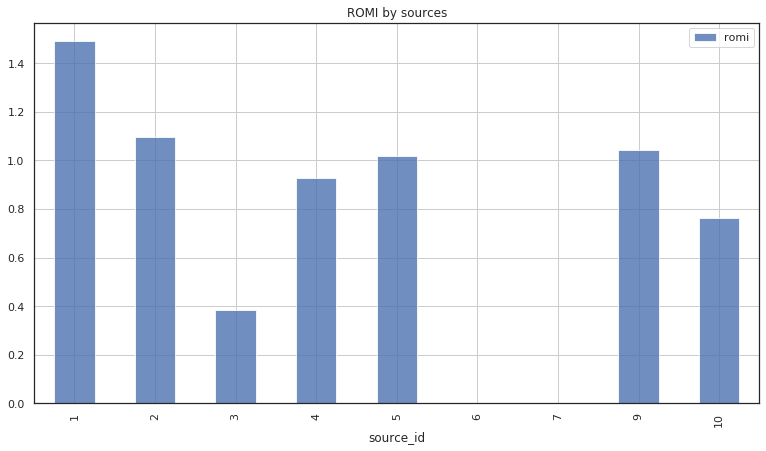

In [60]:
revenue_uid_costs_per_source['ltv'] = revenue_uid_costs_per_source['revenue'] / revenue_uid_costs_per_source['clients']
revenue_uid_costs_per_source['cac'] = revenue_uid_costs_per_source['costs'] / revenue_uid_costs_per_source['clients']
revenue_uid_costs_per_source['romi'] = revenue_uid_costs_per_source['ltv'] / revenue_uid_costs_per_source['cac']
revenue_uid_costs_per_source.groupby('source_id').agg({'romi':'mean'}).plot(kind='bar', figsize=(13,7), style='o-', grid=True, alpha=0.8, title='ROMI by sources')

# Выводы

- Количество пользователей:
    - DAU: 908 пользователей (в день);
    - WAU: 5716 пользователя (в неделю);
    - MAU: 23228 пользователей (в месяц).
    
- среднее количество сессий в день составляет 987 (то есть в среднем каждый пользователь заходит на ресурс 1 раз в день).

- среднестатистическая длительность одной сессии составляет 1 минуту.

- Retention довольно низкий (около 4%), лучшие результаты показывает первая когорта;

- покупать люди начинают в среднем через 16 минут после начала сессии;

- после первого месяцв число покупок резко снижается;

- средний чек составляет 5 т.р.;

- по показателю LTV первая когорта была самая стабильная - практически в каждом месяце она показывала лучший результат по LTV среди всех когорт; вероятно, это коррелирует с наилучшим показателем Retention этой же когорты.

- потратили всего денег: на привлечение - 329131.62, на каждый источник: 
                                                                         1 - 20833.27 
                                                                         2 - 42806.04 
                                                                         3 - 141321.63 
                                                                         4 - 61073.60 
                                                                         5 - 51757.10 
                                                                         9 - 5517.49 
                                                                         10 - 5822.49.


Больше всего средств было потрачено на 3-й источник. Таким образом, пользователи смартфонов оказались дороже для привлечения, чем, например, пользователи ПК. При этом пользователей ПК больше, чем пользователей смартфонов, а расходы на их привлечение окупаются намного лучше.

Целесообразно большую часть средств сосредоточить на привлечении пользователей ПК, а также рассмотреть рекламные источники 6 и 7, так как они наиболее выгодны с точки зрения привлечения новых пользователей.
Имеет смысл увеличить бюджет на источники 1, 2, 4, 5, так как у них наилучшая окупаемость, и сократить бюджет на источники 3, 9, 10 как на наименее окупающиеся.